# Imports

In [1]:
import re
import pandas as pd
import numpy as np
import scipy
import requests
from bs4 import BeautifulSoup
from scipy.stats import linregress
from scipy import stats
import scipy.stats as stats
from scipy.stats import pearsonr, linregress
import statsmodels.api as sm
import pingouin as pg
from statsmodels.stats.multitest import multipletests
from pathlib import Path
import sys
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.ticker as ticker
from matplotlib.colors import ListedColormap
import matplotlib.dates as mdates
import warnings
import matplotlib.cbook
import matplotlib.dates as mdates
import streamlit as st
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = 'notebook'
import plotly.offline as pyo
pyo.init_notebook_mode(connected=True)
import seaborn as sns
sns.set_theme(style="white")
# import calplot
# import july
import time

from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.compose import TransformedTargetRegressor, make_column_transformer, ColumnTransformer, make_column_selector
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_score, adjusted_rand_score,r2_score, mean_squared_error, accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, roc_curve, precision_recall_curve, auc, confusion_matrix
from sklearn.model_selection import RepeatedKFold, cross_val_score

from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression, RidgeClassifier
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor, plot_tree, DecisionTreeClassifier

from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
# from xgboost import XGBRegressor, XGBRFClassifier

In [2]:
# Add project root to sys.path so you can import path_config regardless of notebook location
sys.path.append(str(Path.cwd().parents[2]))  # adjust depth as needed if notebook is deep in folders

from path_config import project_path, project_data_sources_path, project_data_exports_path

print(f'project_path: {project_path}')
print(f'project_data_sources_path: {project_data_sources_path}')
print(f'project_data_exports_path: {project_data_exports_path}')

project_path: /Users/chrisizenour/Library/CloudStorage/Dropbox/python/projects/football
project_data_sources_path: /Users/chrisizenour/Library/CloudStorage/Dropbox/python/projects/football/data/sources
project_data_exports_path: /Users/chrisizenour/Library/CloudStorage/Dropbox/python/projects/football/data/exports


In [3]:
# project_path = Path.cwd()
# print(f'project_path: {project_path}')
# print('')
# project_data_sources_path = Path.cwd() / 'data' / 'sources'
# print(f'project_data_sources_path: {project_data_sources_path}')
# print('')
# project_data_exports_path = Path.cwd() / 'data' / 'exports'
# print(f'project_data_exports_path: {project_data_exports_path}')

# User Defined Functions

## Dataset Import and Wrangling

In [4]:
def load_game_results_dataset():
    df = pd.read_csv(
        project_data_exports_path / 'game_results_df.csv',
        # sheet_name='Sheet1 (2)',
        # header=1,
        # engine='openpyxl',
    )
    # df = df.iloc[:-2]
    if 'Unnamed: 0' in df.columns:
        df = df.drop(columns=['Unnamed: 0'])
    print(f'Shape of dataframe: {df.shape[0]} rows, {df.shape[1]} columns')
    return df

In [5]:
def load_passing_offense_dataset():
    df = pd.read_csv(
        project_data_exports_path / 'passing_offense_df.csv',
        # sheet_name='Sheet1',
        # header=1,
        # engine='openpyxl',
    )
    # df = df.iloc[:-2]
    if 'Unnamed: 0' in df.columns:
        df = df.drop(columns=['Unnamed: 0'])
    print(f'Shape of dataframe: {df.shape[0]} rows, {df.shape[1]} columns')
    return df

In [6]:
def load_receiving_offense_dataset():
    df = pd.read_csv(
        project_data_exports_path / 'receiving_offense_df.csv',
        # sheet_name='Sheet1',
        # header=1,
        # engine='openpyxl',
    )
    # df = df.iloc[:-2]
    if 'Unnamed: 0' in df.columns:
        df = df.drop(columns=['Unnamed: 0'])
    print(f'Shape of dataframe: {df.shape[0]} rows, {df.shape[1]} columns')
    return df

In [7]:
def load_rushing_offense_dataset():
    df = pd.read_csv(
        project_data_exports_path / 'rushing_offense_df.csv',
        # sheet_name='Sheet1',
        # header=1,
        # engine='openpyxl',
    )
    # df = df.iloc[:-2]
    if 'Unnamed: 0' in df.columns:
        df = df.drop(columns=['Unnamed: 0'])
    print(f'Shape of dataframe: {df.shape[0]} rows, {df.shape[1]} columns')
    return df

In [8]:
def load_spotrac_dataset():
    df = pd.read_csv(
        project_data_exports_path / 'spotrac_salary_cap_data_df.csv',
        # sheet_name='Sheet1',
        # header=1,
        # engine='openpyxl',
    )
    # df = df.iloc[:-2]
    if 'Unnamed: 0' in df.columns:
        df = df.drop(columns=['Unnamed: 0'])
    print(f'Shape of dataframe: {df.shape[0]} rows, {df.shape[1]} columns')
    return df

In [9]:
def load_nfl_season_records_dataset():
    df = pd.read_csv(
        project_data_exports_path / 'nfl_season_records_df.csv',
        # sheet_name='Sheet1',
        # header=1,
        # engine='openpyxl',
    )
    # df = df.iloc[:-2]
    if 'Unnamed: 0' in df.columns:
        df = df.drop(columns=['Unnamed: 0'])
    print(f'Shape of dataframe: {df.shape[0]} rows, {df.shape[1]} columns')
    return df

In [10]:
def load_spotrac_nfl_records_dataset():
    df = pd.read_csv(
        project_data_exports_path / 'spotrac_nfl_records_df.csv',
        # sheet_name='Sheet1',
        # header=1,
        # engine='openpyxl',
    )
    # df = df.iloc[:-2]
    if 'Unnamed: 0' in df.columns:
        df = df.drop(columns=['Unnamed: 0'])
    print(f'Shape of dataframe: {df.shape[0]} rows, {df.shape[1]} columns')
    return df

In [11]:
def load_team_season_records_stats_dataset():
    df = pd.read_csv(
        project_data_exports_path / 'team_season_records_stats_df.csv',
        # sheet_name='Sheet1',
        # header=1,
        # engine='openpyxl',
    )
    # df = df.iloc[:-2]
    if 'Unnamed: 0' in df.columns:
        df = df.drop(columns=['Unnamed: 0'])
    print(f'Shape of dataframe: {df.shape[0]} rows, {df.shape[1]} columns')
    return df

In [12]:
def load_spotrac_nfl_team_season_roster_df_dataset():
    df = pd.read_csv(
        project_data_exports_path / 'spotrac_nfl_team_season_roster_df.csv',
        # sheet_name='Sheet1',
        # header=1,
        # engine='openpyxl',
    )
    # df = df.iloc[:-2]
    if 'Unnamed: 0' in df.columns:
        df = df.drop(columns=['Unnamed: 0'])
    print(f'Shape of dataframe: {df.shape[0]} rows, {df.shape[1]} columns')
    return df

In [13]:
def load_spotrac_nfl_team_season_roster_pos_df_dataset():
    df = pd.read_csv(
        project_data_exports_path / 'spotrac_nfl_team_season_roster_pos_df.csv',
        # sheet_name='Sheet1',
        # header=1,
        # engine='openpyxl',
    )
    # df = df.iloc[:-2]
    if 'Unnamed: 0' in df.columns:
        df = df.drop(columns=['Unnamed: 0'])
    print(f'Shape of dataframe: {df.shape[0]} rows, {df.shape[1]} columns')
    return df

In [14]:
def load_spotrac_nfl_team_season_roster_position_level_one_df_dataset():
    df = pd.read_csv(
        project_data_exports_path / 'spotrac_nfl_team_season_roster_position_level_one_df.csv',
        # sheet_name='Sheet1',
        # header=1,
        # engine='openpyxl',
    )
    # df = df.iloc[:-2]
    if 'Unnamed: 0' in df.columns:
        df = df.drop(columns=['Unnamed: 0'])
    print(f'Shape of dataframe: {df.shape[0]} rows, {df.shape[1]} columns')
    return df

In [15]:
def load_spotrac_nfl_team_season_roster_position_level_two_df_dataset():
    df = pd.read_csv(
        project_data_exports_path / 'spotrac_nfl_team_season_roster_position_level_two_df.csv',
        # sheet_name='Sheet1',
        # header=1,
        # engine='openpyxl',
    )
    # df = df.iloc[:-2]
    if 'Unnamed: 0' in df.columns:
        df = df.drop(columns=['Unnamed: 0'])
    print(f'Shape of dataframe: {df.shape[0]} rows, {df.shape[1]} columns')
    return df

In [16]:
def load_spotrac_nfl_team_position_level_one_active_inactive_grouped_dataset():
    df = pd.read_csv(
        project_data_exports_path / 'spotrac_nfl_team_position_level_one_active_inactive_grouped_df.csv',
        # sheet_name='Sheet1',
        # header=1,
        # engine='openpyxl',
    )
    # df = df.iloc[:-2]
    if 'Unnamed: 0' in df.columns:
        df = df.drop(columns=['Unnamed: 0'])
    print(f'Shape of dataframe: {df.shape[0]} rows, {df.shape[1]} columns')
    return df

In [17]:
def load_spotrac_nfl_team_position_level_two_active_inactive_grouped_dataset():
    df = pd.read_csv(
        project_data_exports_path / 'spotrac_nfl_team_position_level_two_active_inactive_grouped_df.csv',
        # sheet_name='Sheet1',
        # header=1,
        # engine='openpyxl',
    )
    # df = df.iloc[:-2]
    if 'Unnamed: 0' in df.columns:
        df = df.drop(columns=['Unnamed: 0'])
    print(f'Shape of dataframe: {df.shape[0]} rows, {df.shape[1]} columns')
    return df

In [18]:
def load_spotrac_nfl_team_pos_level_one_grouped_dataset():
    df = pd.read_csv(
        project_data_exports_path / 'spotrac_nfl_team_pos_level_one_grouped_df.csv',
        # sheet_name='Sheet1',
        # header=1,
        # engine='openpyxl',
    )
    # df = df.iloc[:-2]
    if 'Unnamed: 0' in df.columns:
        df = df.drop(columns=['Unnamed: 0'])
    print(f'Shape of dataframe: {df.shape[0]} rows, {df.shape[1]} columns')
    return df

In [19]:
def load_spotrac_nfl_team_pos_level_two_grouped_dataset():
    df = pd.read_csv(
        project_data_exports_path / 'spotrac_nfl_team_pos_level_two_grouped_df.csv',
        # sheet_name='Sheet1',
        # header=1,
        # engine='openpyxl',
    )
    # df = df.iloc[:-2]
    if 'Unnamed: 0' in df.columns:
        df = df.drop(columns=['Unnamed: 0'])
    print(f'Shape of dataframe: {df.shape[0]} rows, {df.shape[1]} columns')
    return df

## Corr & Pval Analysis

In [20]:
def correlation_matrix(df):
    """create correlation matrix dataframe"""
    df_corr_mat = df.corr()
    return df_corr_mat

In [21]:
def correlation_series(df):
    """create a dataframe which has unique feature pairs and their associated correlation coefficient"""
    upper_corr_mat = df.where(np.triu(np.ones(df.shape), k=1).astype(bool))
    unique_corr_pairs = upper_corr_mat.unstack().dropna()
    df_corr_series = unique_corr_pairs.sort_values(ascending=False)
    df_corr_series = df_corr_series.reset_index()
    df_corr_series = df_corr_series.rename(columns={
        'level_0': 'feature_1',
        'level_1': 'feature_2',
        0: 'correlation_coefficient'
    })
    return df_corr_series

In [22]:
def correlation_plot(df, title='Correlation Heatmap'):
    """create a correlation heatmap plot using seaborn"""
    mask = np.triu(np.ones_like(df, dtype=bool))
    f, ax = plt.subplots(1, 1, figsize=(11,9), facecolor='white')
    cmap = sns.diverging_palette(230, 20, as_cmap=True)
    sns.heatmap(df,
                mask=mask,
                cmap=cmap,
                vmax=1,
                vmin=-1,
                center=0,
                annot=False,
                square=True,
                linewidths=0.5,
                cbar_kws={'shrink': 0.5})
    ax.set_title(title)
    ax.set_xlabel('Variables')
    ax.set_ylabel('Variables')

    plt.tight_layout()
    return f

In [23]:
def p_val_matrix(df):
    """create p-value matrix dataframe"""
    df_p_val_mat = df.corr(method=lambda x, y: stats.pearsonr(x, y)[1]) - np.eye(len(df.columns))
    return df_p_val_mat

In [24]:
def p_val_series(df):
    """create a dataframe which has unique feature pairs and their associated level of statistical significance"""
    upper_corr_mat = df.where(np.triu(np.ones(df.shape), k=1).astype(bool))
    unique_p_val_pairs = upper_corr_mat.unstack().dropna()
    df_p_val_series = unique_p_val_pairs.sort_values()
    df_p_val_series = df_p_val_series.reset_index()
    df_p_val_series = df_p_val_series.rename(columns={
        'level_0': 'feature_1',
        'level_1': 'feature_2',
        0: 'p_value'
    })
    return df_p_val_series

In [25]:
def p_val_plot(df, title="P-value Heatmap (Green: Significant, White: Not Significant)"):
    """create a level of statistical significance heatmap plot using seaborn"""
    alpha = 0.05
    mask = np.triu(np.ones_like(df, dtype=bool))
    f, ax = plt.subplots(1, 1, figsize=(11,9))
    green = sns.light_palette('seagreen', reverse=True, as_cmap=True)
    green.set_over('white')
    # cmap = sns.diverging_palette(230, 20, as_cmap=True)
    sns.heatmap(df,
                mask=mask,
                cmap=green,
                # cmap=cmap,
                vmax=alpha,
                vmin=0,
                # center=0,
                annot=False,
                square=True,
                linewidths=0.5,
                cbar_kws={'shrink': 0.5})
    ax.set_title(title)
    ax.set_xlabel('Variables')
    ax.set_ylabel('Variables')
    plt.tight_layout()
    return f

In [26]:
game_results_df = load_game_results_dataset()
passing_offense_df = load_passing_offense_dataset()
receiving_offense_df = load_receiving_offense_dataset()
rushing_offense_df = load_rushing_offense_dataset()
spotrac_df = load_spotrac_dataset()
nfl_season_records_df = load_nfl_season_records_dataset()
spotrac_nfl_records_df = load_spotrac_nfl_records_dataset()
team_season_records_stats_df = load_team_season_records_stats_dataset()
pos_lev_one_act_inact_df = load_spotrac_nfl_team_position_level_one_active_inactive_grouped_dataset()
pos_lev_two_act_inact_df = load_spotrac_nfl_team_position_level_two_active_inactive_grouped_dataset()
pos_lev_one_df = load_spotrac_nfl_team_pos_level_one_grouped_dataset()
pos_lev_two_df = load_spotrac_nfl_team_pos_level_two_grouped_dataset()

spotrac_nfl_team_season_roster_df = load_spotrac_nfl_team_season_roster_df_dataset()
spotrac_nfl_team_season_roster_pos_df = load_spotrac_nfl_team_season_roster_pos_df_dataset()
spotrac_nfl_team_season_roster_position_level_one_df = load_spotrac_nfl_team_season_roster_position_level_one_df_dataset()
spotrac_nfl_team_season_roster_position_level_two_df = load_spotrac_nfl_team_season_roster_position_level_two_df_dataset()

Shape of dataframe: 26910 rows, 15 columns
Shape of dataframe: 16046 rows, 23 columns
Shape of dataframe: 61793 rows, 24 columns
Shape of dataframe: 50107 rows, 24 columns
Shape of dataframe: 59357 rows, 16 columns
Shape of dataframe: 448 rows, 38 columns
Shape of dataframe: 59357 rows, 54 columns
Shape of dataframe: 4054 rows, 49 columns
Shape of dataframe: 1344 rows, 23 columns
Shape of dataframe: 4032 rows, 23 columns
Shape of dataframe: 1344 rows, 13 columns
Shape of dataframe: 4032 rows, 13 columns
Shape of dataframe: 896 rows, 15 columns
Shape of dataframe: 16458 rows, 16 columns
Shape of dataframe: 2605 rows, 16 columns
Shape of dataframe: 7893 rows, 16 columns


# Team Active - Inactive No Positions

In [27]:
spotrac_nfl_team_season_roster_df

,team,season,roster_status,player_count,cap_hit_sum,player_count_prop,cap_hit_prop,w,l,pct,pf,pa,net_pts,div_win_pct,conf_win_pct
0,arizona-cardinals,2011,active,58,111028866.0,0.716049,0.937187,8,8,0.500,312,348,-36,0.667,0.583
1,arizona-cardinals,2011,inactive,23,7441498.0,0.283951,0.062813,8,8,0.500,312,348,-36,0.667,0.583
2,arizona-cardinals,2012,active,53,88769403.0,0.638554,0.753574,5,11,0.313,250,357,-107,0.167,0.250
3,arizona-cardinals,2012,inactive,30,29028393.0,0.361446,0.246426,5,11,0.313,250,357,-107,0.167,0.250
4,arizona-cardinals,2013,active,52,92369539.0,0.495238,0.769450,10,6,0.625,379,324,55,0.333,0.500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891,washington-commanders,2022,inactive,86,47974051.0,0.618705,0.230569,8,8,0.500,321,343,-22,0.417,0.458
892,washington-commanders,2023,active,53,133719895.0,0.339744,0.610152,4,13,0.235,329,518,-189,0.000,0.167
893,washington-commanders,2023,inactive,103,85438357.0,0.660256,0.389848,4,13,0.235,329,518,-189,0.000,0.167
894,washington-commanders,2024,active,53,186228005.0,0.341935,0.773911,12,5,0.706,485,391,94,0.667,0.750


In [28]:
def summary_stats_df(df, cols):
    summary_stats_results = {}
    for col in cols:
        stats = df[col].agg(['count', 'mean', 'std', 'min', 'var', 'median'])
        quartiles = df[col].quantile([0.25, 0.75])
        summary_stats_results[col] = [stats['count'], stats['mean'], stats['std'], stats['min'], quartiles[0.25], stats['median'], quartiles[0.75], df[col].max(), stats['var']]

    summary_stats_results_df = pd.DataFrame(
        summary_stats_results,
        index=['count', 'mean', 'std', 'min', '25%', 'median', '75%', 'max', 'variance']
    )

    return summary_stats_results_df


In [29]:
summary_stats_cols = ['player_count', 'cap_hit_prop', 'pct']

summary_stats_result_df = summary_stats_df(spotrac_nfl_team_season_roster_df, summary_stats_cols)

summary_stats_result_df.to_csv(f'{project_data_exports_path}/summary_stats_result_df.csv')
summary_stats_result_df

,player_count,cap_hit_prop,pct
count,896.000000,896.000000,896.000000
mean,66.246652,0.500000,0.500237
std,23.236229,0.262784,0.191222
min,7.000000,0.013379,0.000000
25%,53.000000,0.258404,0.375000
median,55.000000,0.500000,0.500000
75%,84.000000,0.741596,0.647000
max,164.000000,0.986621,0.938000
variance,539.922335,0.069056,0.036566


In [30]:
summary_stats_cols = ['player_count', 'cap_hit_prop', 'pct']

# Calculate the statistics for each column in the list
summary_stats_results = {}
for col in summary_stats_cols:
    stats = spotrac_nfl_team_season_roster_df[col].agg(['count', 'mean', 'std', 'min', 'var', 'median'])
    quartiles = spotrac_nfl_team_season_roster_df[col].quantile([0.25, 0.75])
    summary_stats_results[col] = [stats['count'], stats['mean'], stats['std'], stats['min'], quartiles[0.25], stats['median'], quartiles[0.75], spotrac_nfl_team_season_roster_df[col].max(), stats['var']]

# Create a new dataframe with the calculated statistics for each column
summary_stats_result_df = pd.DataFrame(
    summary_stats_results,
    index=['count', 'mean', 'std', 'min', '25%', 'median', '75%', 'max', 'variance']
)

summary_stats_result_df.to_csv(f'{project_data_exports_path}/summary_stats_result_df.csv')
summary_stats_result_df

,player_count,cap_hit_prop,pct
count,896.000000,896.000000,896.000000
mean,66.246652,0.500000,0.500237
std,23.236229,0.262784,0.191222
min,7.000000,0.013379,0.000000
25%,53.000000,0.258404,0.375000
median,55.000000,0.500000,0.500000
75%,84.000000,0.741596,0.647000
max,164.000000,0.986621,0.938000
variance,539.922335,0.069056,0.036566


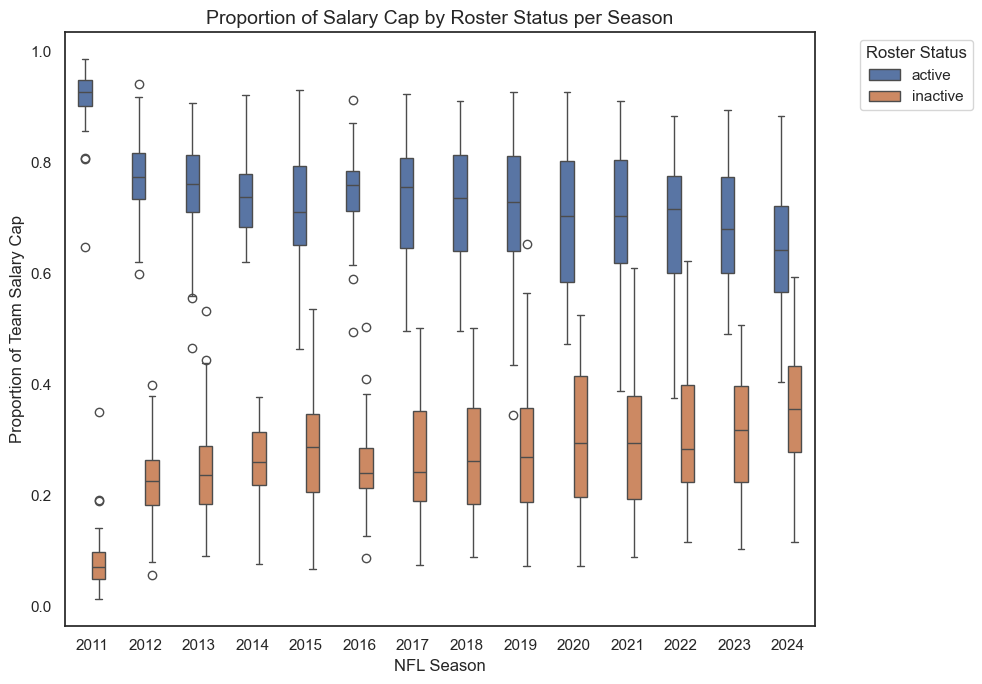

In [31]:
overall_season_roster_status_cap_hit_prop_boxplot, ax = plt.subplots(1, 1, figsize=(10, 7), facecolor='white')
sns.boxplot(
    spotrac_nfl_team_season_roster_df,
    x='season',
    y='cap_hit_prop',
    hue='roster_status',
    width=0.5,
    ax=ax
)

# Set titles and axis labels
ax.set_title('Proportion of Salary Cap by Roster Status per Season', fontsize=14)
ax.set_xlabel('NFL Season', fontsize=12)
ax.set_ylabel('Proportion of Team Salary Cap', fontsize=12)

# Move legend outside of plot
ax.legend(title='Roster Status', bbox_to_anchor=(1.05, 1), loc='upper left')

# Improve layout to fit legend
overall_season_roster_status_cap_hit_prop_boxplot.tight_layout()
overall_season_roster_status_cap_hit_prop_boxplot.savefig(f'{project_data_exports_path}/overall_season_roster_status_cap_hit_prop_boxplot.png', dpi=300, bbox_inches='tight')

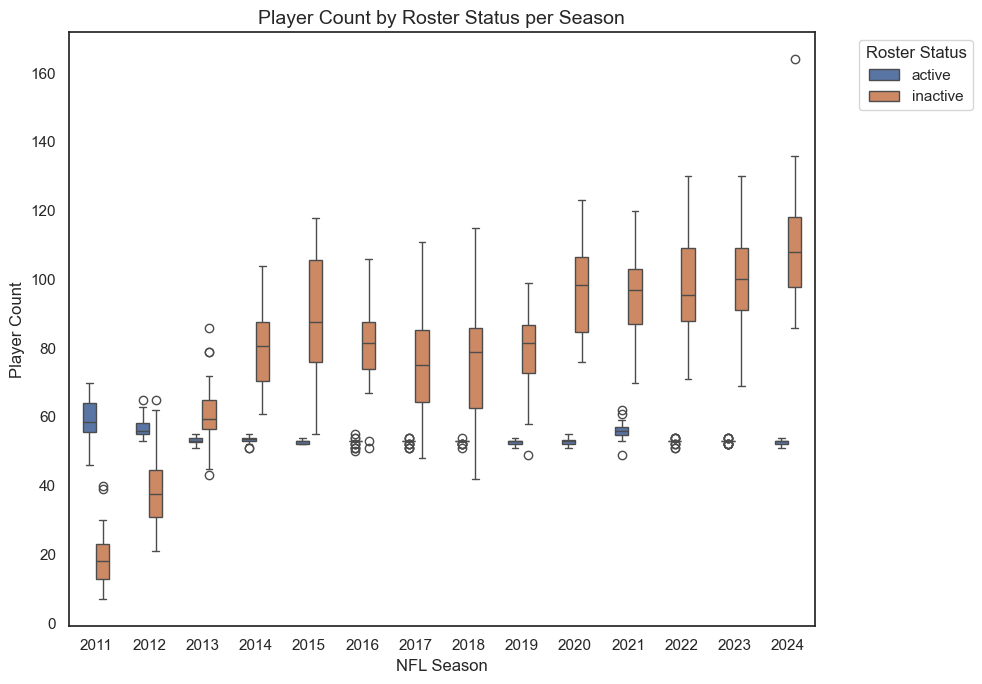

In [32]:
overall_season_roster_status_player_count_boxplot, ax = plt.subplots(1, 1, figsize=(10, 7), facecolor='white')
sns.boxplot(
    spotrac_nfl_team_season_roster_df,
    x='season',
    y='player_count',
    hue='roster_status',
    width=0.5,
    ax=ax
)

# Set titles and axis labels
ax.set_title('Player Count by Roster Status per Season', fontsize=14)
ax.set_xlabel('NFL Season', fontsize=12)
ax.set_ylabel('Player Count', fontsize=12)

# Move legend outside of plot
ax.legend(title='Roster Status', bbox_to_anchor=(1.05, 1), loc='upper left')

# Improve layout to fit legend
overall_season_roster_status_player_count_boxplot.tight_layout()
overall_season_roster_status_player_count_boxplot.savefig(f'{project_data_exports_path}/overall_season_roster_status_player_count_boxplot.png', dpi=300, bbox_inches='tight')

In [33]:
spotrac_nfl_records_df.loc[spotrac_nfl_records_df['cap_hit_pct_league_cap'] > 10, :].sort_values(['cap_hit_pct_league_cap'], ascending=False)

,table_row_number,player,pos,age,cap_hit,cap_hit_pct_league_cap,dead_cap,cash_total,free_agent_year,team,...,conf_ties,non-conf_wins,non-conf_losses,non-conf_ties,last_5_wins,last_5_losses,last_5_ties,nfl_team_name,nfl_season_records_index,index
56407,1.0,Jimmy Garoppolo,QB,27.0,37000000.0,20.88,-41800000.0,41950000.0,2023.0,san-francisco-49ers,...,0,2,2,0,2,3,0,san-francisco-49ers,227,56407
46446,1.0,Russell Wilson,QB,36.0,53000000.0,20.75,0.0,0.0,NaN,denver-broncos,...,0,4,1,0,3,2,0,denver-broncos,433,46446
38733,1.0,Matt Ryan,QB,37.0,40525000.0,19.46,0.0,0.0,NaN,atlanta-falcons,...,0,1,4,0,2,3,0,atlanta-falcons,359,38733
53617,1.0,Kyler Murray,QB,27.0,49118177.0,19.23,-112421000.0,38872407.0,2029.0,arizona-cardinals,...,0,4,1,0,2,3,0,arizona-cardinals,428,53617
36834,1.0,Ryan Tannehill,QB,34.0,38600000.0,18.54,-57400000.0,29000000.0,2024.0,tennessee-titans,...,0,2,3,0,0,5,0,tennessee-titans,364,36834
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9953,1.0,Eli Manning,QB,34.0,14450000.0,10.09,-80250000.0,37010004.0,2020.0,new-york-giants,...,0,2,2,0,1,4,0,new-york-giants,137,9953
46104,1.0,Garett Bolles,LT,30.0,21000000.0,10.09,-29000000.0,17000000.0,2025.0,denver-broncos,...,0,2,3,0,2,3,0,denver-broncos,356,46104
54427,1.0,Trumaine Johnson,CB,27.0,16742400.0,10.03,-16742000.0,16742400.0,2018.0,los-angeles-rams,...,0,4,0,0,3,2,0,los-angeles-rams,218,54427
205,1.0,Mario Williams,DE,28.0,12400000.0,10.03,-15200000.0,15000000.0,2018.0,buffalo-bills,...,0,1,3,0,2,3,0,buffalo-bills,72,205


In [34]:
spotrac_nfl_records_df.groupby(['team', 'season'], observed=True).agg({'index': 'count',
                                                                       'cap_hit_pct_league_cap': 'sum'})


index  cap_hit_pct_league_cap
team                  season                               
arizona-cardinals     2011       81                   98.46
                      2012       83                   97.71
                      2013      105                   97.11
                      2014      140                  100.10
                      2015      129                  100.98
...                             ...                     ...
washington-commanders 2020      147                   97.47
                      2021      153                  106.06
                      2022      139                   99.93
                      2023      156                   97.49
                      2024      155                   94.19

[448 rows x 2 columns]

In [35]:
nfl_season_records_df

,nfl_team,w,l,t,pct,pf,pa,net_pts,home,road,...,conf_losses,conf_ties,non-conf_wins,non-conf_losses,non-conf_ties,last_5_wins,last_5_losses,last_5_ties,nfl_team_name,nfl_season_records_index
0,Indianapolis Colts,2,14,0,0.125,243,430,-187,2 - 6 - 0,0 - 8 - 0,...,10,0,0,4,0,2,3,0,indianapolis-colts,0
1,Los Angeles Rams,2,14,0,0.125,193,407,-214,1 - 7 - 0,1 - 7 - 0,...,11,0,1,3,0,0,5,0,los-angeles-rams,1
2,Minnesota Vikings,3,13,0,0.188,340,449,-109,1 - 7 - 0,2 - 6 - 0,...,9,0,0,4,0,1,4,0,minnesota-vikings,2
3,Cleveland Browns,4,12,0,0.250,218,307,-89,3 - 5 - 0,1 - 7 - 0,...,9,0,1,3,0,0,5,0,cleveland-browns,3
4,Tampa Bay Buccaneers,4,12,0,0.250,287,494,-207,3 - 5 - 0,1 - 7 - 0,...,9,0,1,3,0,0,5,0,tampa-bay-buccaneers,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443,Buffalo Bills,13,4,0,0.765,525,368,157,8 - 0 - 0,5 - 4 - 0,...,3,0,4,1,0,3,2,0,buffalo-bills,443
444,Minnesota Vikings,14,3,0,0.824,432,332,100,8 - 1 - 0,6 - 2 - 0,...,3,0,5,0,0,4,1,0,minnesota-vikings,444
445,Philadelphia Eagles,14,3,0,0.824,463,303,160,8 - 1 - 0,6 - 2 - 0,...,3,0,5,0,0,4,1,0,philadelphia-eagles,445
446,Detroit Lions,15,2,0,0.882,564,342,222,7 - 2 - 0,8 - 0 - 0,...,1,0,4,1,0,4,1,0,detroit-lions,446


In [36]:
# spotrac_nfl_team_pos_level_two_grouped_df = spotrac_nfl_records_df.groupby(['team', 'season', 'position_level_two'], observed=True).agg({'index': 'count',
#                                                                                              'cap_hit_pct_league_cap': 'sum'}).reset_index()
# spotrac_nfl_team_pos_level_two_grouped_df = spotrac_nfl_team_pos_level_two_grouped_df.rename(columns={'index': 'player_count',
#                                                                                                       'cap_hit_pct_league_cap': 'cap_hit_pct_sum'})
#
# spotrac_nfl_team_pos_level_two_grouped_df = pd.merge(spotrac_nfl_team_pos_level_two_grouped_df, nfl_season_records_df[['w', 'l', 'pct', 'pf', 'pa', 'net_pts', 'div_win_pct', 'conf_win_pct', 'nfl_team_name', 'season']], how='left', left_on=['team', 'season'], right_on=['nfl_team_name', 'season'])
# spotrac_nfl_team_pos_level_two_grouped_df = spotrac_nfl_team_pos_level_two_grouped_df.drop(['nfl_team_name'], axis=1)
#
# spotrac_nfl_team_pos_level_two_grouped_df.to_csv(f'{project_data_exports_path}/spotrac_nfl_team_pos_level_two_grouped_df.csv')
# spotrac_nfl_team_pos_level_two_grouped_df

In [37]:
spotrac_nfl_records_df.groupby(['team', 'season', 'table_number', 'pos'], observed=True).agg({'cap_hit_pct_league_cap': 'sum'})

cap_hit_pct_league_cap
team                  season table_number pos                        
arizona-cardinals     2011   0            C                      1.95
                                          CB                     7.21
                                          DE                     6.56
                                          DT                     2.70
                                          FB                     0.35
...                                                               ...
washington-commanders 2024   3            RT                     0.01
                                          S                      0.06
                                          T                      0.10
                                          TE                     0.72
                                          WR                     3.04

[21548 rows x 1 columns]

In [38]:
spotrac_nfl_records_df.groupby([
    # 'team',
    'position_level_two',
    # 'season'
], observed=True).agg({'index': 'count',
                       'cap_hit_pct_league_cap': ['mean', 'std']})

index cap_hit_pct_league_cap          
                    count                   mean       std
position_level_two                                        
defensive_line       8720               0.834596  1.647123
linebacker           7783               0.758395  1.511274
offensive_line       9818               0.812402  1.491797
quarterback          2492               1.836705  3.562728
running_back         5004               0.497932  1.012955
secondary           11295               0.672340  1.327179
special_team         2501               0.543834  0.672398
tight_end            3902               0.570874  1.078722
wide_receiver        7842               0.652270  1.482460

In [39]:
spotrac_nfl_records_df.loc[spotrac_nfl_records_df['pos'] == 'QB', :]

,table_row_number,player,pos,age,cap_hit,cap_hit_pct_league_cap,dead_cap,cash_total,free_agent_year,team,...,conf_ties,non-conf_wins,non-conf_losses,non-conf_ties,last_5_wins,last_5_losses,last_5_ties,nfl_team_name,nfl_season_records_index,index
0,1.0,Ryan Fitzpatrick,QB,29.0,5610000.0,4.66,0.0,13220000.0,2012.0,buffalo-bills,...,0,2,2,0,1,4,0,buffalo-bills,7,0
9,10.0,Tyler Thigpen,QB,27.0,2500000.0,2.08,0.0,3500000.0,2013.0,buffalo-bills,...,0,2,2,0,1,4,0,buffalo-bills,7,9
78,13.0,Levi Brown,QB,24.0,51750.0,0.04,0.0,0.0,NaN,buffalo-bills,...,0,2,2,0,1,4,0,buffalo-bills,7,78
90,2.0,Ryan Fitzpatrick,QB,30.0,6000000.0,4.98,-15000000.0,8000000.0,2018.0,buffalo-bills,...,0,1,3,0,2,3,0,buffalo-bills,39,90
101,13.0,Tarvaris Jackson,QB,29.0,1950000.0,1.62,0.0,1950000.0,2013.0,buffalo-bills,...,0,1,3,0,2,3,0,buffalo-bills,39,101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59226,52.0,John Rhys Plumlee,QB,23.0,44167.0,0.02,0.0,44167.0,2026.0,seattle-seahawks,...,0,4,1,0,3,2,0,seattle-seahawks,437,59226
59276,21.0,Jaren Hall,QB,26.0,200000.0,0.08,0.0,0.0,NaN,seattle-seahawks,...,0,4,1,0,3,2,0,seattle-seahawks,437,59276
59296,41.0,Jaren Hall,QB,26.0,101666.0,0.04,0.0,0.0,NaN,seattle-seahawks,...,0,4,1,0,3,2,0,seattle-seahawks,437,59296
59304,49.0,John Rhys Plumlee,QB,23.0,87500.0,0.03,0.0,0.0,NaN,seattle-seahawks,...,0,4,1,0,3,2,0,seattle-seahawks,437,59304


In [40]:
spotrac_nfl_records_df.groupby([
    # 'team',
    'pos',
    # 'season'
], observed=True).agg({'index': 'count',
                       'cap_hit_pct_league_cap': ['mean', 'std']})

index cap_hit_pct_league_cap          
    count                   mean       std
pos                                       
C    1803               0.790172  1.347185
CB   6581               0.682073  1.411955
DE   4406               0.904110  1.735020
DT   4314               0.763600  1.549208
FB    734               0.378351  0.549931
FS   1182               1.048756  1.499349
G    3691               0.742596  1.293214
ILB  2639               0.797154  1.372720
K    1035               0.623179  0.817527
KR     12               0.108333  0.132791
LB   1496               0.280120  0.726896
LS    668               0.376931  0.265466
LT   1084               1.923423  2.528771
OL     10               0.214000  0.192596
OLB  3646               0.926925  1.781038
P     785               0.588191  0.680477
PR      1               0.320000       NaN
QB   2492               1.836705  3.562728
RB   4270               0.518487  1.071303
RT   1412               0.978789  1.420170
S    2402               0.325341  0.762033
SS   1130               0.959522  1.388168
T    1818               0.187778  0.537629
TE   3902               0.570874  1.078722
WLB     2               0.135000  0.176777
WR   7842               0.652270  1.482460

<Axes: xlabel='cap_hit_pct_league_cap', ylabel='Count'>

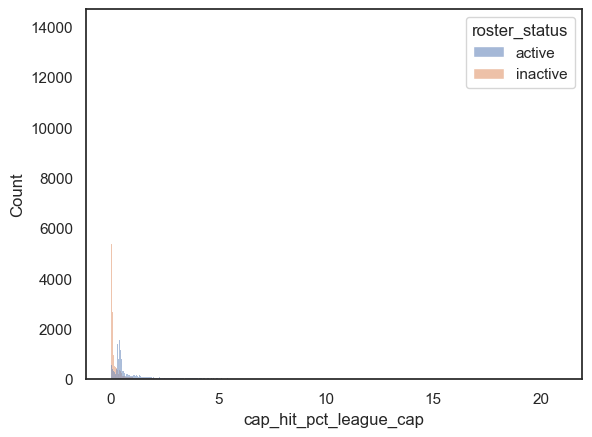

In [41]:
sns.histplot(
    data=spotrac_nfl_records_df,
    x='cap_hit_pct_league_cap',
    hue='roster_status'
    # log_scale=True
)

In [42]:
nfl_season_records_df

,nfl_team,w,l,t,pct,pf,pa,net_pts,home,road,...,conf_losses,conf_ties,non-conf_wins,non-conf_losses,non-conf_ties,last_5_wins,last_5_losses,last_5_ties,nfl_team_name,nfl_season_records_index
0,Indianapolis Colts,2,14,0,0.125,243,430,-187,2 - 6 - 0,0 - 8 - 0,...,10,0,0,4,0,2,3,0,indianapolis-colts,0
1,Los Angeles Rams,2,14,0,0.125,193,407,-214,1 - 7 - 0,1 - 7 - 0,...,11,0,1,3,0,0,5,0,los-angeles-rams,1
2,Minnesota Vikings,3,13,0,0.188,340,449,-109,1 - 7 - 0,2 - 6 - 0,...,9,0,0,4,0,1,4,0,minnesota-vikings,2
3,Cleveland Browns,4,12,0,0.250,218,307,-89,3 - 5 - 0,1 - 7 - 0,...,9,0,1,3,0,0,5,0,cleveland-browns,3
4,Tampa Bay Buccaneers,4,12,0,0.250,287,494,-207,3 - 5 - 0,1 - 7 - 0,...,9,0,1,3,0,0,5,0,tampa-bay-buccaneers,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443,Buffalo Bills,13,4,0,0.765,525,368,157,8 - 0 - 0,5 - 4 - 0,...,3,0,4,1,0,3,2,0,buffalo-bills,443
444,Minnesota Vikings,14,3,0,0.824,432,332,100,8 - 1 - 0,6 - 2 - 0,...,3,0,5,0,0,4,1,0,minnesota-vikings,444
445,Philadelphia Eagles,14,3,0,0.824,463,303,160,8 - 1 - 0,6 - 2 - 0,...,3,0,5,0,0,4,1,0,philadelphia-eagles,445
446,Detroit Lions,15,2,0,0.882,564,342,222,7 - 2 - 0,8 - 0 - 0,...,1,0,4,1,0,4,1,0,detroit-lions,446


<Axes: xlabel='pct', ylabel='Count'>

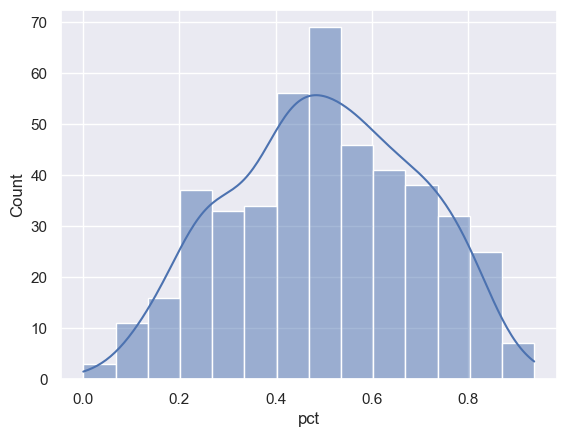

In [43]:
sns.histplot(
    data=nfl_season_records_df,
    x='pct',
    # log_scale=True,
    kde=True,
)

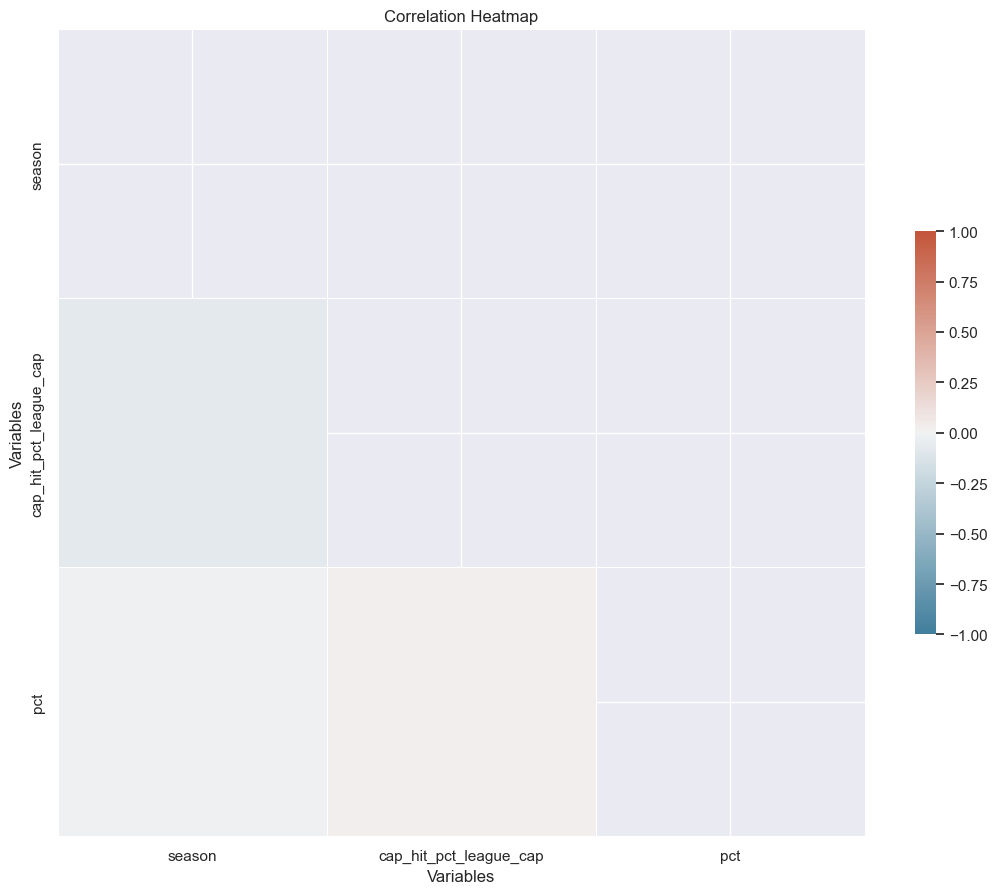

In [44]:
spotrac_nfl_records_corr_df = correlation_matrix(spotrac_nfl_records_df[['season', 'cap_hit_pct_league_cap', 'pct']])

spotrac_nfl_records_corr_df_heatmap = correlation_plot(spotrac_nfl_records_corr_df)
spotrac_nfl_records_corr_df_heatmap.savefig(f'{project_data_exports_path}/spotrac_nfl_records_corr_df_heatmap.png', dpi=300, bbox_inches='tight')